# 📚 Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification 

A classification is where you try to classify something as one thing or another
* Binary classification
* Muticlass classification
* Multilabel classification

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples 

n_samples = 1000

# Create 2 Circles
# X contains points for circles, Y Contains data whether its inside or not 
X, Y = make_circles(n_samples, noise=0.03, random_state=42)

X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
Y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

## Visualize 
Our sample data is again, pretty hard to analyze, so we have to visualize it

### With a dataframe

In [4]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":Y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


### With a plot

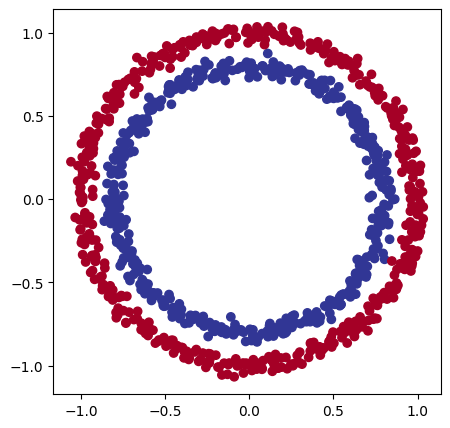

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.RdYlBu)

## Train Model

In [6]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.8369 - accuracy: 0.4450
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5901 - accuracy: 0.4650
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7284 - accuracy: 0.4750
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7053 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.4910
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4970
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4480
Epoch 11/

In [7]:
model.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7003 - accuracy: 0.5040


[0.7002502083778381, 0.5040000081062317]

### Visualize 
To visualize our model's prediction, let's create a function `plot_decision_boundary()`, this function will: 
* Take in a trained model, features (X) and labels (Y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [8]:
import numpy as np 

def plot_decision_boundary(model, X, Y): 
    """
    Plots the decision boundary created by a model predicting on X.
    Read more at
    https://cs231n.github.io/neural-networks-case-study/
    https://github.com/GokuMohandas/Made-With-ML (Perceptrons)
    """
    # Define the axis boundary of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Create X value (we're gonna make preds on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification.")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else: 
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


  1/313 [..............................] - ETA: 24s

313/313 [==============================] - 0s 970us/step
Doing binary classification


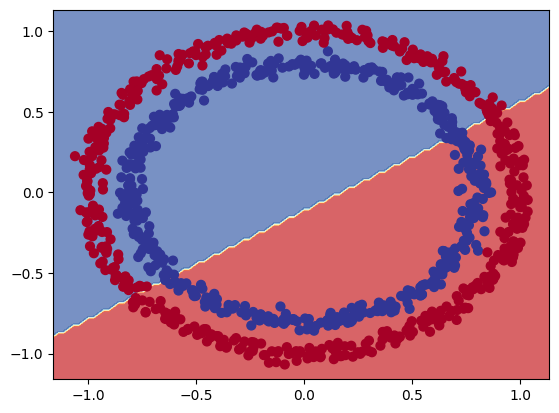

In [9]:
# Check out the predictions our model is making

plot_decision_boundary(model, X, Y)

In [10]:
# Let's see if our model can be used for a refression problem...

tf.random.set_seed(42)

# Create some regression data

X_regression = tf.range(0,1000, 5)
Y_regression = tf.range(100,1100,5) # y = X + 100

# Let's split the data to training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
Y_reg_train = Y_regression[:150]
Y_reg_test = Y_regression[150:]

model_r = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_r.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

model_r.fit(tf.expand_dims(X_reg_train, axis=-1), Y_reg_train, epochs=100)

Epoch 1/100


5/5 [==============================] - 0s 2ms/step - loss: 451.8470 - mae: 451.8470
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 331.4970 - mae: 331.4970
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 215.2101 - mae: 215.2101
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 94.0902 - mae: 94.0902
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 61.2229 - mae: 61.2229
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 89.7304 - mae: 89.7304
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 66.5082 - mae: 66.5082
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 43.7896 - mae: 43.7896
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 48.4833 - mae: 48.4833
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 41.6439 - mae: 41.6439
Epoch 11/100
5/5 [==============================] - 0s 2ms/step -

2/2 [==============================] - 0s 3ms/step


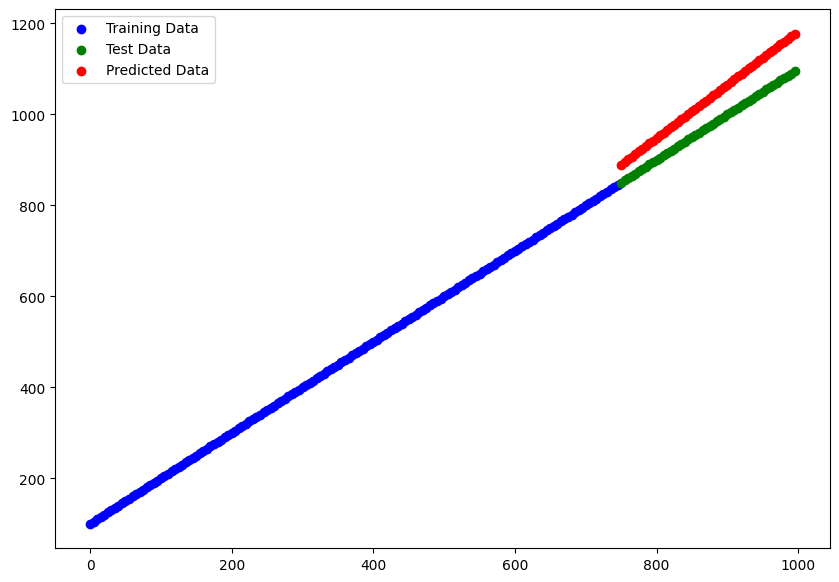

In [11]:
# Make predicitons with our trained model

Y_reg_preds = model_r.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, Y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, Y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, Y_reg_preds, c="r", label="Predicted Data")
plt.legend()

## Non Linearity


In [12]:
tf.random.set_seed(42)

model_l = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

model_l.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model_l.fit(X, Y, epochs=100)

Epoch 1/100


32/32 [==============================] - 0s 1ms/step - loss: 6.3411 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3365 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3351 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 6.3339 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3237 - accuracy: 0.4900
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2825 - accuracy: 0.4890
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2765 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2747 - accuracy: 0.4880
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2639 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 6.2617 - accuracy: 0.4890
Epoch 11/100
32/32 [=

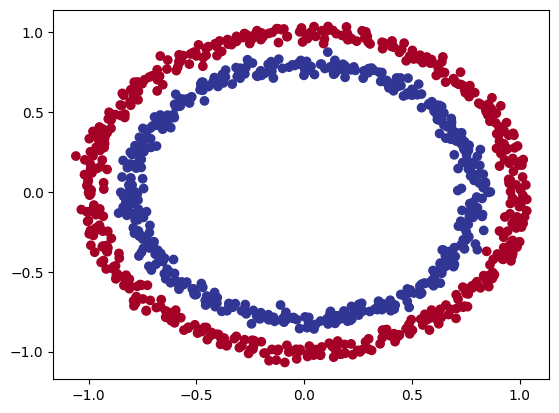

In [13]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.RdYlBu)

  1/313 [..............................] - ETA: 11s

313/313 [==============================] - 0s 963us/step
Doing binary classification


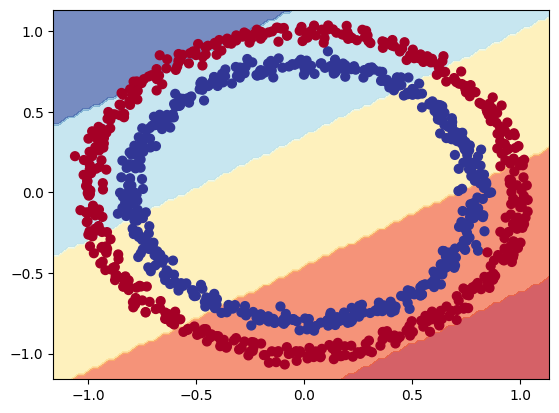

In [14]:
# Check the decision boundary for our model 

plot_decision_boundary(model_l, X, Y)

### Let's use a non linear activation func

In [15]:
tf.random.set_seed(42)

model_nl = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
])

model_nl.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model_nl.fit(X, Y, epochs=100)

Epoch 1/100


32/32 [==============================] - 0s 2ms/step - loss: 4.4860 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4603 - accuracy: 0.4700
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.4299 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4070 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3949 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3858 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3709 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3331 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3275 - accuracy: 0.4740
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 4.3228 - accuracy: 0.4740
Epoch 11/100
32/32 [=

## Reason for low accuracy outputs

Binary classification uses sigmoid activation for output, our activation function till now has been, None/Linear.

In [16]:
tf.random.set_seed(42)

model_nl_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_nl_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

history = model_nl_2.fit(X, Y, epochs=175)

Epoch 1/175


32/32 [==============================] - 0s 1ms/step - loss: 0.6916 - accuracy: 0.5020
Epoch 2/175
32/32 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5080
Epoch 3/175
32/32 [==============================] - 0s 1ms/step - loss: 0.6895 - accuracy: 0.5240
Epoch 4/175
32/32 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5140
Epoch 5/175
32/32 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5220
Epoch 6/175
32/32 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5230
Epoch 7/175
32/32 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.5400
Epoch 8/175
32/32 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5510
Epoch 9/175
32/32 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5560
Epoch 10/175
32/32 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.5470
Epoch 11/175
32/32 [=

In [17]:
# Evaluate again
model_nl_2.evaluate(X,Y)

32/32 [==============================] - 0s 991us/step - loss: 0.1250 - accuracy: 0.9900


[0.12500624358654022, 0.9900000095367432]

313/313 [==============================] - 0s 805us/step
Doing binary classification


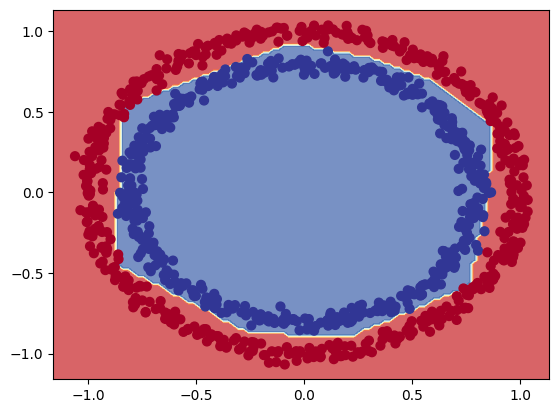

In [18]:
# Let's visualize our model's predictions
plot_decision_boundary(model_nl_2, X, Y)

## 🌟 Activation Functions
[Read More](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html)

## Evaluating and improving our classification

So far, in this unit, we have been training and testing on the same dataset... (to learn about activation functions (but still...))

In Machine Learning, this is basically... a sin lol

So for starters, let's create a training and a test set.

In [19]:
# Split into train and test set, can use indexing but here, we love abstraction so imma use scikit learn's method
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [20]:
# Let's create the model on the training data now

tf.random.set_seed(42)

model_nl_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_nl_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

history = model_nl_3.fit(X_train, Y_train, epochs=75)

Epoch 1/75


25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4900
Epoch 2/75
25/25 [==============================] - 0s 879us/step - loss: 0.6864 - accuracy: 0.5175
Epoch 3/75
25/25 [==============================] - 0s 958us/step - loss: 0.6807 - accuracy: 0.5362
Epoch 4/75
25/25 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.5600
Epoch 5/75
25/25 [==============================] - 0s 897us/step - loss: 0.6718 - accuracy: 0.5462
Epoch 6/75
25/25 [==============================] - 0s 958us/step - loss: 0.6632 - accuracy: 0.5713
Epoch 7/75
25/25 [==============================] - 0s 875us/step - loss: 0.6516 - accuracy: 0.6075
Epoch 8/75
25/25 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.6212
Epoch 9/75
25/25 [==============================] - 0s 1ms/step - loss: 0.6289 - accuracy: 0.6212
Epoch 10/75
25/25 [==============================] - 0s 875us/step - loss: 0.6128 - accuracy: 0.6913
Epoch 11/75
25/25 

In [21]:
model_nl_3.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0340 - accuracy: 0.9950


[0.033974047750234604, 0.9950000047683716]

313/313 [==============================] - 0s 933us/step
Doing binary classification
313/313 [==============================] - 0s 839us/step
Doing binary classification


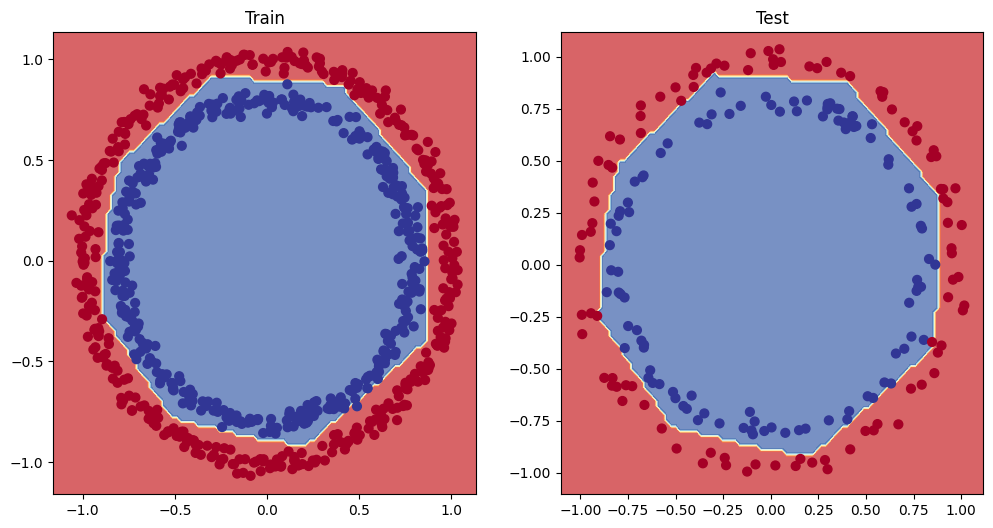

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_nl_3, X_train, Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_nl_3, X_test, Y_test)
plt.show()

## Optimal Training

Note how we increased the learning rate by 10 times, and how we decreased the epochs... 

To optimize the length of this training we should visualize the fitting of the previous arbitrary training routine

In [23]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.692162,0.49000
1,0.686449,0.51750
2,0.680704,0.53625
3,0.676958,0.56000
4,0.671813,0.54625
...,...,...
70,0.019929,0.99750
71,0.018639,0.99750
72,0.014963,0.99875
73,0.014260,0.99750


Text(0.5, 1.0, 'Model_nl_3 loss curves')

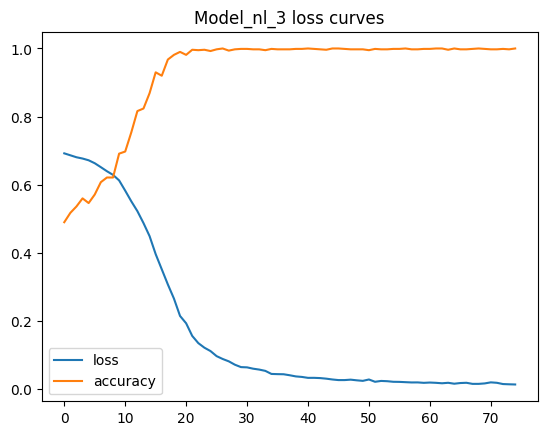

In [24]:
# Plot the loss curves

pd.DataFrame(history.history).plot()
plt.title("Model_nl_3 loss curves")

## Optimizing the learning rate

We want the loss to decrease as fast as possible when starting out

We are gonna use the following steps:
* A learning rate **callback** - Sub-routine performed *while* training
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [25]:
tf.random.set_seed(42)

model_nl_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_nl_4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

# To have a callback exist while training, it needs to be defined first
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_nl_4 = model_nl_4.fit(X_train, Y_train, epochs=100, callbacks=[
    lr_scheduler
])

Epoch 1/100


25/25 [==============================] - 0s 1ms/step - loss: 0.7019 - accuracy: 0.5038 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.5100 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6997 - accuracy: 0.5125 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6987 - accuracy: 0.5050 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.5075 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5075 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5063 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6925 - ac

<Axes: xlabel='epochs'>

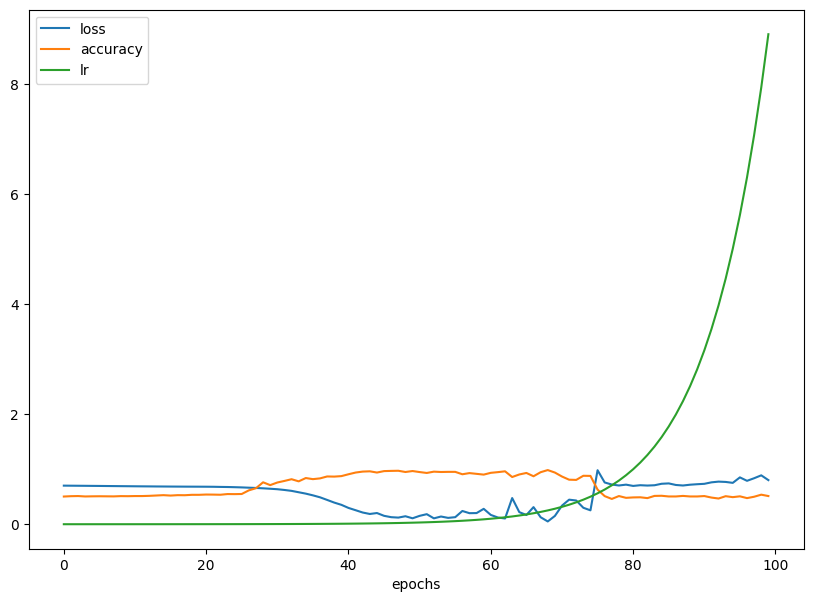

In [26]:
# Checkout the history

pd.DataFrame(history_nl_4.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

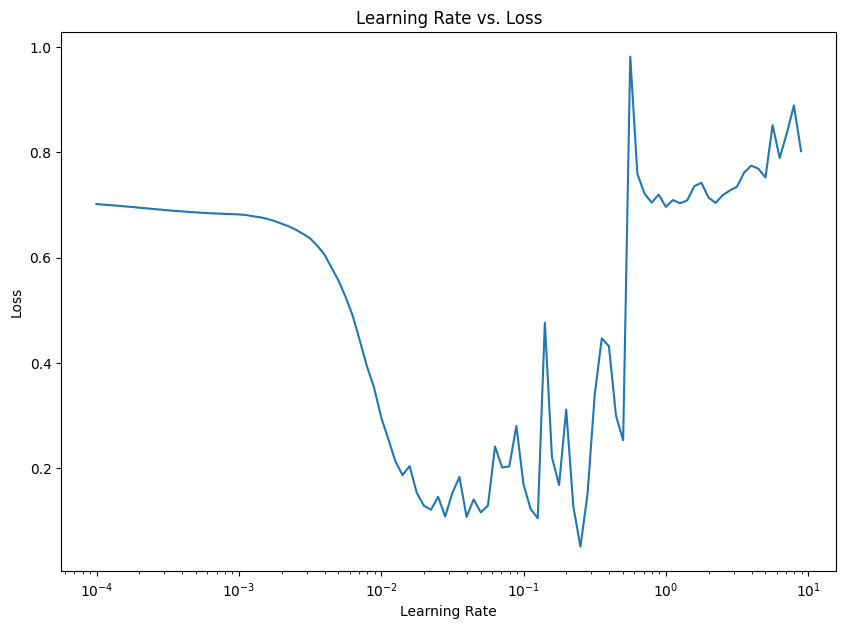

In [27]:
# Plot learningrate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_nl_4.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

## Using the Ideal Learning Rate

In [28]:
model_nl_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_nl_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=["accuracy"]
)

history_nl_5 = model_nl_5.fit(X_train, Y_train, epochs=55)

Epoch 1/55


25/25 [==============================] - 0s 917us/step - loss: 0.7022 - accuracy: 0.4925
Epoch 2/55
25/25 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5163
Epoch 3/55
25/25 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5138
Epoch 4/55
25/25 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.5512
Epoch 5/55
25/25 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5150
Epoch 6/55
25/25 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.5525
Epoch 7/55
25/25 [==============================] - 0s 1ms/step - loss: 0.6616 - accuracy: 0.5537
Epoch 8/55
25/25 [==============================] - 0s 917us/step - loss: 0.6555 - accuracy: 0.5700
Epoch 9/55
25/25 [==============================] - 0s 936us/step - loss: 0.6256 - accuracy: 0.6675
Epoch 10/55
25/25 [==============================] - 0s 1ms/step - loss: 0.5755 - accuracy: 0.7025
Epoch 11/55
25/25 [=====

In [29]:
model_nl_5.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9750


[0.0763959139585495, 0.9750000238418579]

313/313 [==============================] - 0s 787us/step
Doing binary classification
313/313 [==============================] - 0s 770us/step
Doing binary classification


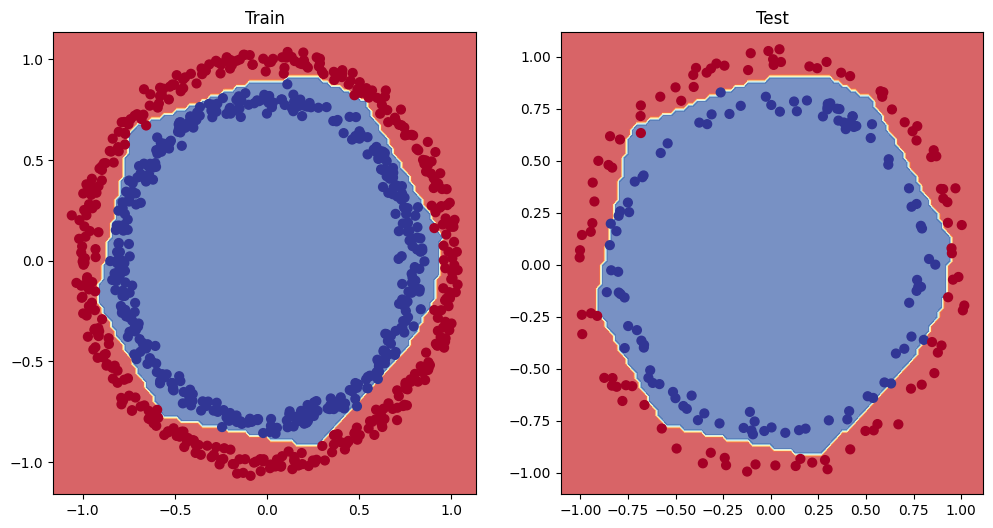

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_nl_5, X_train, Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_nl_5, X_test, Y_test)
plt.show()

## Classification evaluation methods
> * tp = True Positive
> * tn = True Negative
> * fp = False Positive
> * fn = False Negative

| Metric Name 	| Metric Formula              	| Code                                                              	| When to use                                                                      	| 
|-------------	|-----------------------------	|-------------------------------------------------------------------	|----------------------------------------------------------------------------------	|
| Accuracy    	| $$(tp + tn)/(tp+tn+fp+fn)$$ 	| tf.keras.metrics.Accuracy() \|\| sklearn.metrics.accuracy_score() 	| Default Metric for classification problems. Not the best for imbalanced classes. 	|  
| Precision    	| $$tp/(tp + fp)$$              | tf.keras.metrics.Precision() \|\| sklearn.metrics.precision_score()   | Higher precision leads to less false positives.                               	|  
| Recall     	| $$tp/(tp+fn)$$                | tf.keras.metrics.Recall() \|\| sklearn.metrics.recall_score()       	| Higher recall leads to less false negatives.                                  	|  
| F1-Score    	| $$2.((precision.recall)/(precision+recall))$$ | sklearn.metrics.f1_score()                            | Combination of precision and recall, usually a good overall metric for a classification model  |  
| Confusion Matrix| **N/A**                     | sklearn.metrics.confusion_matrix()       	    | When comparing predictions to truth labels to see where model gets confused. Can be hard to use with large number of classes	|  
| Classification Report | **N/A**                     | sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn') | Build a text report showing the main classification metrics.	|  

In [31]:
loss, accuracy = model_nl_5.evaluate(X_test, Y_test)

print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 1000us/step - loss: 0.0764 - accuracy: 0.9750
Model loss on the test set: 0.0763959139585495
Model accuracy on the test set: 97.50%


### Confusion Matrix

The prediction array comes out in prediction probability form, the standard output from the sigmoid (or softmax) activation functions.

In [33]:
from sklearn.metrics import confusion_matrix

Y_preds = tf.round(model_nl_5.predict(X_test))

confusion_matrix(Y_test, Y_preds)

7/7 [==============================] - 0s 1ms/step


array([[99,  1],
       [ 4, 96]], dtype=int64)

### Let's make it more representative

The confusion matrix can be made a bit more easier to read, we'll be doing that now

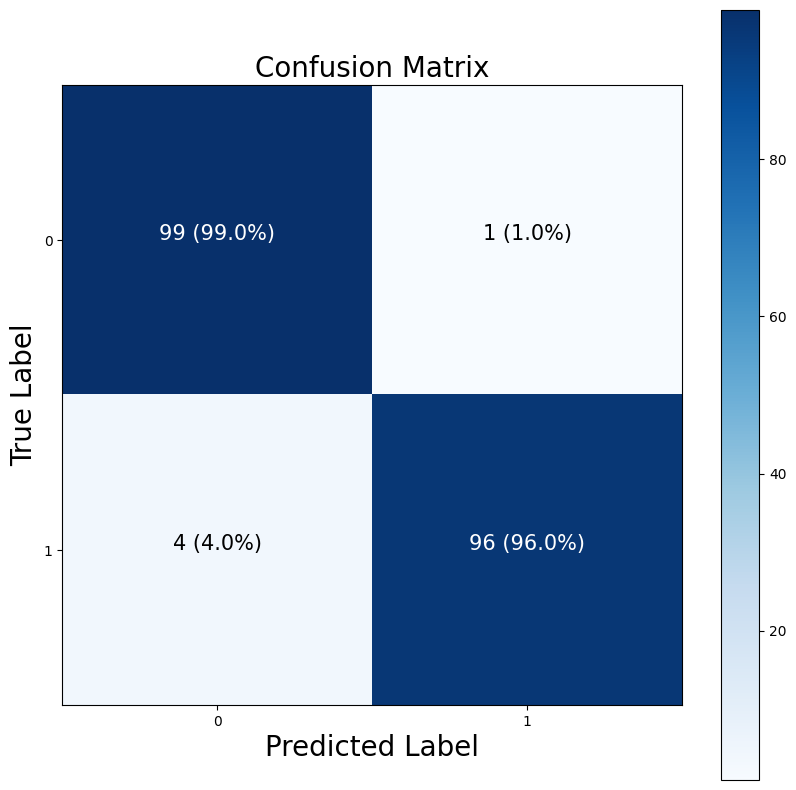

In [39]:
import itertools

figsize= (10,10)

# Create the confusion matrix

cm = confusion_matrix(Y_test, Y_preds)
cm_norm = cm.astype("float") / cm.sum(axis=1) [:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot 
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create Classes
classes = False

if classes:
    labels = classes
else: 
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(
    title="Confusion Matrix",
    xlabel = "Predicted Label",
    ylabel = "True Label",
    xticks=np.arange(n_classes),
    yticks=np.arange(n_classes),
    xticklabels=labels,
    yticklabels=labels
)   

# Set x-axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) /2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)", horizontalalignment="center", color="white" if cm[i,j] > threshold else "black", size=15)

## Beautiful

And with that, this section is complete! 🚀🥳

![Alt text](assets/image-1.png)